In [2]:
import argparse
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np






#-----------------------------------------#
plot_seasons_sites(FileName=FileName, 
                   Reference=Reference, 
                   psFileName=psFileName, 
                   PS=PS, 
                   DataRange=Range, 
                   PageTitle=PageTitle, 
                   PPQ=PPQ, 
                   _Extra=_Extra)
#------------------------------------------------
   # eds 5/11/11 modified to include reference file 
   # for use in mercury model benchmarking          
   #------------------------------------------------

   #=======================================
   # Setup
   #=======================================

DataDir = 'data/' #eds 5/11/11     #Using bench mark from somewhere, "!" could mean something 
 
#-------------------------------------------#   

    
    
    
Species = 'TGM'
DiagN = 'IJ-AVG-$'

#--------------------------------------------#
if Keyword_set(psFileName):
    PS = 1L 
else: 
    PS = 0L
 

if not Keyword_set( psFileName ) ):
    psFileName = 'seasons.'+species+'.ps' 
 #--------------------------------------------#      
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#    
# Not too sure about this line.    
# LOG = Keyword_set( Log )
 
# if ( not Keyword_set( Range ) ) then $
      #Range = [4, 400]
# unit = 'ppqv'
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#


# File with monthly TGM data
TGMfile = DataDir + 'TGMSiteMonthly.csv' #eds 5/11/11
Hg0file = DataDir + 'Hg0SiteMonthly.csv'

# Conversion factor ng/m3 -> ppqv @273K, 1013hPa 
ngm3_ppqv = 112
pptv_ngm3 = 8.93                 #eds 5/11/11



#=======================================
# Read TGM data
#=======================================

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Big ol' space for programming
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

#=======================================
# Plotting
#=======================================


#All in IDL bizaro language

#pos=p POS FOR LOG FLOAT
monthstr= np.array(['J','F','M','A','M','J','J','A','S','O','N','D'])

#   for S=0L, nsites-1L do begin

#      p = getpos( 0.63,  pos=p, margin=0 ) POS FOR LOG FLOAT

# Use higher range for sites with high mean observation or model
#if (keyword_set(ppq)) then begin
if (keyword_set(ppq)):
    plt.ylim ([100, 300])
    plt.ylabel('Hg(0) [ppqv]')        #1
    plt.ylabel('TGM [ppqv]')          #2
else:
    yrange = [1.0, 2.5] #eds 5/11/11
    plt.ylabel('Hg(0) [ng/m!u3!n]')   #1
    plt.ylabel('TGM [ng/m!u3!n]')     #2

    
# Larger yrange for some sites ;sjs, 4/23/15
elsif #(TGMsite[S] 'ShangriLa'): 
plt.ylim ([1.0, 3.2])
      
# Use smaller range for Southern Hemisphere
if (keyword_set(ppq)):
plt.ylim #yrange = (TGMlat[S] lt 0) ? [0, 200] : yrange 
else:
plt.ylim #yrange = (TGMlat[S] lt 0) ? [0.5, 2.0] : yrange #eds 5/11/11


# Plot Observations
# eds 5/11/11 cleaned up to make easier to see Hg(0) or TGM
elsif IDHg0[S]:
    plt.plot(TGMdat[S,*], #months)
    plt.ylabel('Hg(0) [ppqv]') 
    plt.xlim(-0.5,11.5)
    #Some limit of y
    
      #plot, TGMdat[S,*], /color, /nodata, $
            #ytitle=ytitle1, $ 
            #xrange=[-0.5,11.5], yrange=yrange, /xstyle, /ystyle, $ 
      #xticks=11, xtickv=indgen(12), xtickname=monthstr, $
      #yminor=2, ticklen=0.01, thick=3.0, charsize=1.2, $
           # title=TGMsite[S], pos=p     POS FOR LOG FLOAT
     # oplot, TGMdat[S,*], color=!myct.gray67, thick=3
     # errplot, TGMdat[S,*]-TGMstd[S,*], TGMdat[S,*]+TGMstd[S,*], $
         #      color=!myct.gray67, thick=3
      #oplot, Hg0mod[S,*], color=3, thick=3
      #oplot, Hg0ref[S,*], color=6, thick=3

elsif:




# plot, TGMdat[S,*], /color, /nodata, $
            #ytitle=ytitle2, $
            #xrange=[-0.5,11.5], yrange=yrange, /xstyle, /ystyle, $
     # xticks=11, xtickv=indgen(12), xtickname=monthstr, $
      #yminor=2, ticklen=0.01, thick=3.0, charsize=1.2, $
       #     title=TGMsite[S], pos=p
      #oplot, TGMdat[S,*], color=!myct.black, thick=3
      #errplot, TGMdat[S,*]-TGMstd[S,*], TGMdat[S,*]+TGMstd[S,*], $
      #         color=!myct.black, thick=3
     # ; These should be TGM, not Hg0 (jaf, 7/7/11)
      #;oplot, Hg0mod[S,*], color=2, thick=3
     # ;oplot, Hg0ref[S,*], color=4, thick=3
      #oplot, TGMmod[S,*], color=2, thick=3
     # oplot, TGMref[S,*], color=4, thick=3

      #endelse

 #     if ( S ne nsites-1L ) then $
 #        multipanel, /advance, pos=p            POS FOR LOG FLOAT

 #  endfor
   
#   multipanel, /off

#   ; Make legend ;modified eds 5/11/11
#   standard_label = ['Obs TGM', 'Obs Hg(0)', 'New Model TGM', 'New Model Hg(0)']
#   ref_label = ['Obs TGM', 'Obs Hg(0)', 'New Model TGM', 'New Model Hg(0)', $
#      'Reference Model TGM', 'Reference Model Hg(0)']

#   if (keyword_set(reference)) then begin
#   legend, label=ref_label, $
#      lcolor=[1, !myct.gray67, 2, 3, 4, 6], line=fltarr(6), thick=3, $
#      halign=0.90, valign=-0.10, charsize=0.75
#   endif else begin
#   legend, label=standard_label, $                                                  
#      lcolor=[1, !myct.gray67, 2, 3], line=fltarr(4), thick=3, $
#      halign=0.90, valign=-0.10, charsize=0.75
#   endelse

#   If Keyword_Set( PS ) then $
#ps_setup, /close

SyntaxError: invalid syntax (<ipython-input-2-be9cd79a2342>, line 42)

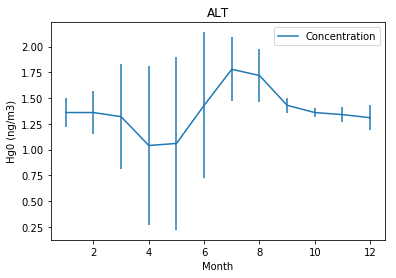

In [133]:
import argparse
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
from datetime import datetime

#Read in the data file- Just one site to start-Observed 
#Open monthly data 

Hgobs = pd.read_csv('Documents/HG/HgBenchmark/data/TGMSiteMonthly1.csv')

%matplotlib inline
ALT_Dataset=Hgobs[Hgobs.SiteID =='ALT']

ALT_Dataset.plot(x='Month', y="Concentration",yerr='Standard deviation')
plt.xlabel('Month')
plt.ylabel('Hg0 (ng/m3)')
plt.title('ALT')
plt.show()



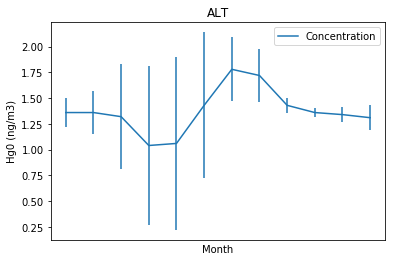

In [86]:
import argparse
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import calendar
import matplotlib.dates as mdates

#Read in the data file- Just one site to start-Observed 
#Open monthly data 

Hgobs = pd.read_csv('Documents/HG/HgBenchmark/data/TGMSiteMonthly1.csv')

%matplotlib inline
ALT_Dataset=Hgobs[Hgobs.SiteID =='ALT']

months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%b')


ALT_Dataset.plot(x= "Month" , y="Concentration" ,yerr='Standard deviation')
X=plt.gca().xaxis
X.set_major_locator(months)
X.set_major_formatter(monthsFmt)
plt.xlabel('Month')
plt.ylabel('Hg0 (ng/m3)')
plt.title('ALT')
plt.show()



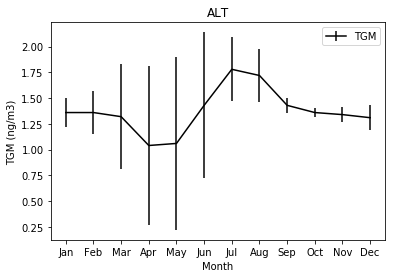

In [119]:
import argparse
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
from datetime import datetime

#Read in the data file- Just one site to start-Observed 
#Open monthly data 

Hgobs = pd.read_csv('Documents/HG/HgBenchmark/data/TGMSiteMonthly1.csv')

%matplotlib inline
ALT_Dataset=Hgobs[Hgobs.SiteID =='ALT']

ALT_Dataset.index=pd.to_datetime(ALT_Dataset.Month, format='%m')

ax=ALT_Dataset.plot(x='Month', y='Concentration',yerr='Standard deviation',color= "k")
plt.xlabel('Month')
plt.ylabel('TGM (ng/m3)')
plt.title('ALT')
plt.legend(['TGM'])
ax.set_xticks(ALT_Dataset.Month)
ax.set_xticklabels(ALT_Dataset.index.strftime('%b'))
plt.show()



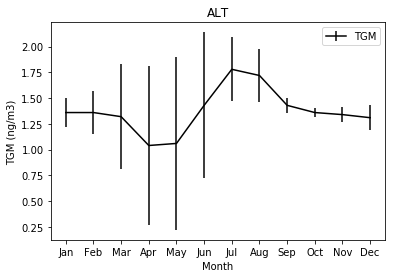

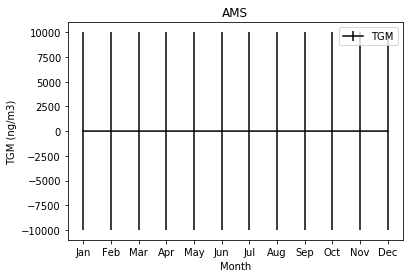

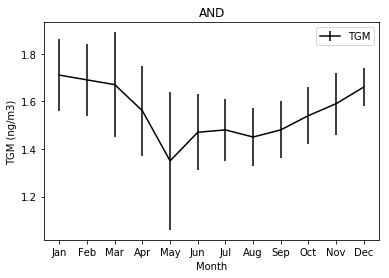

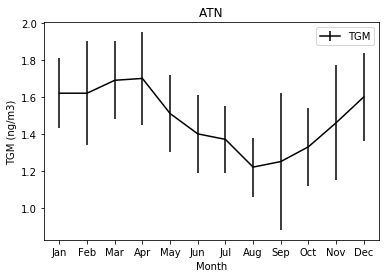

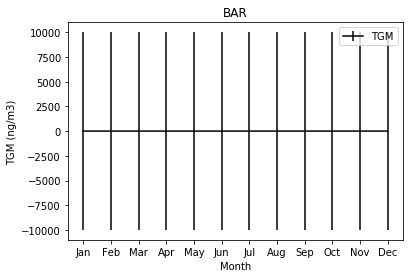

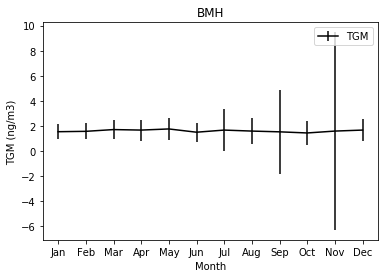

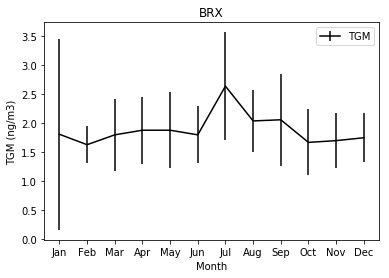

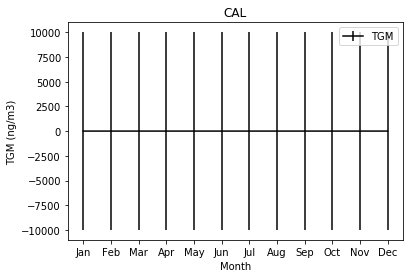

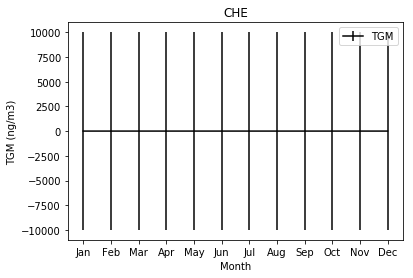

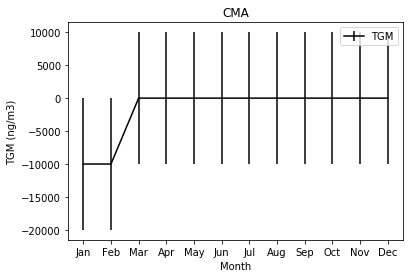

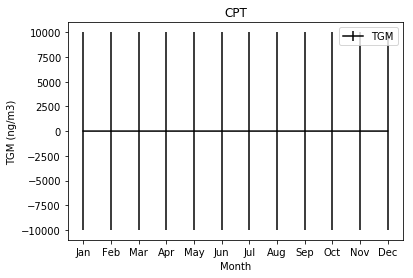

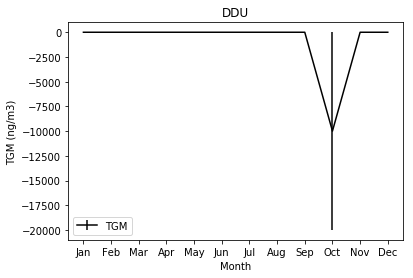

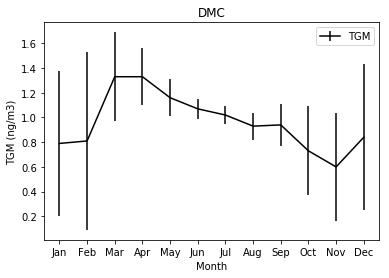

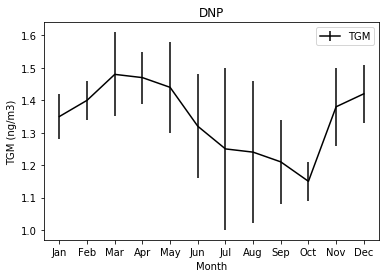

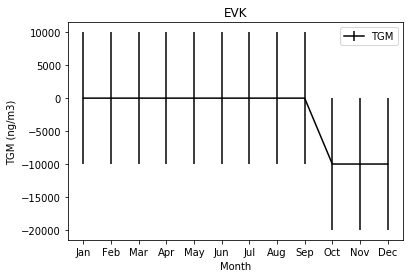

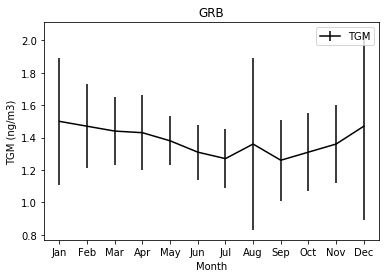

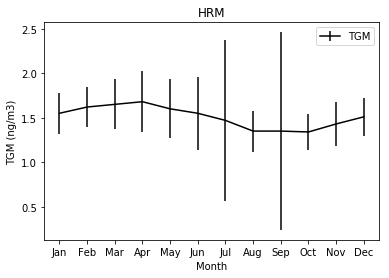

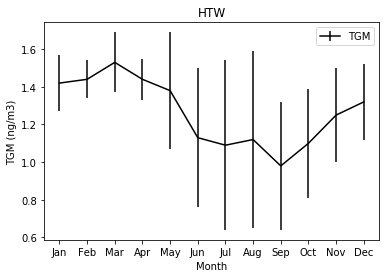

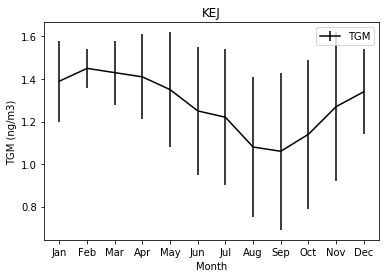

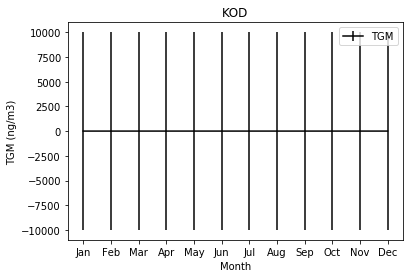

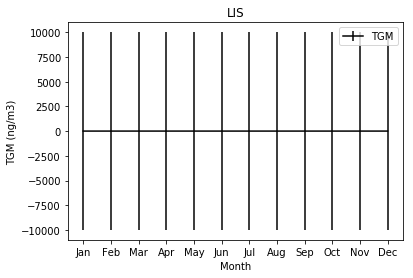

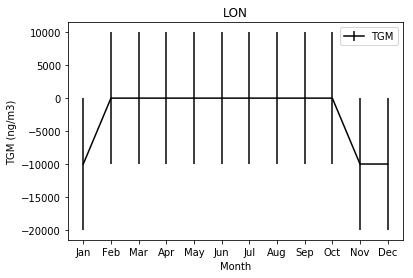

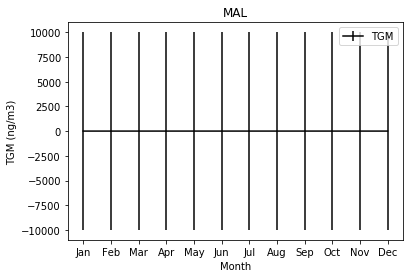

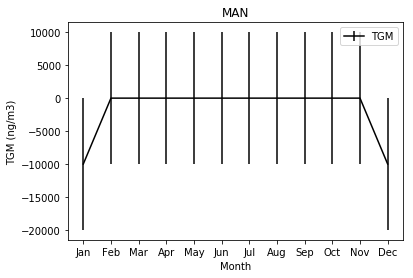

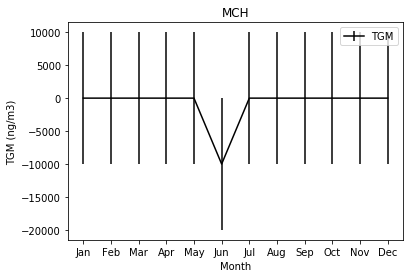

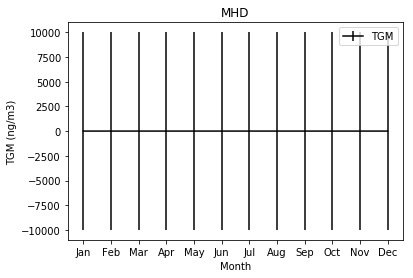

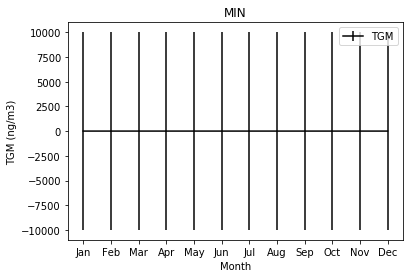

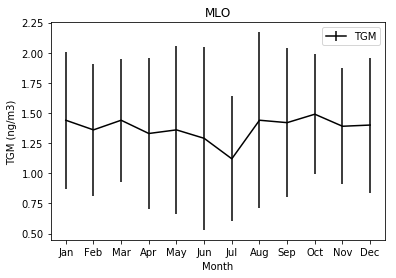

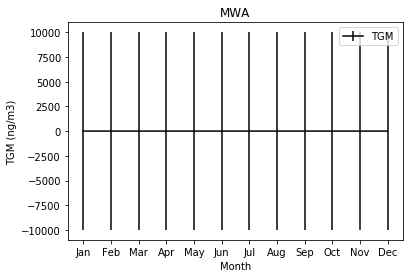

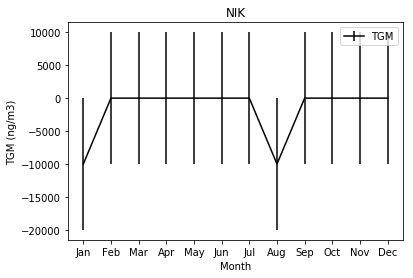

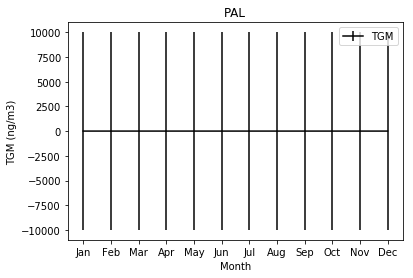

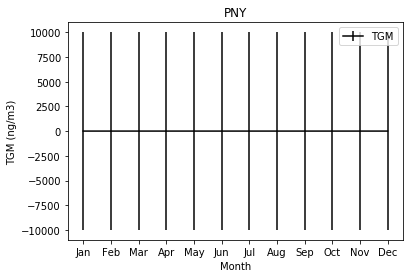

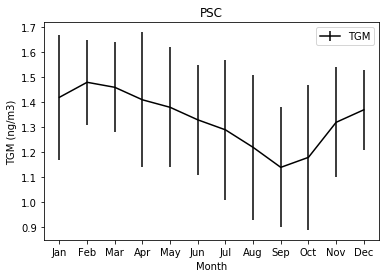

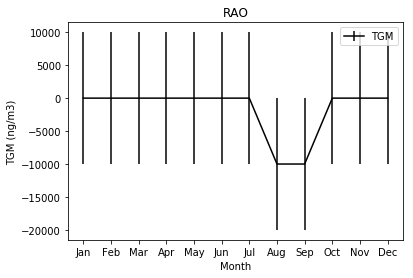

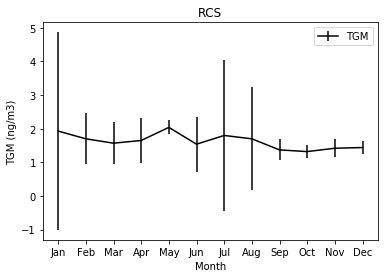

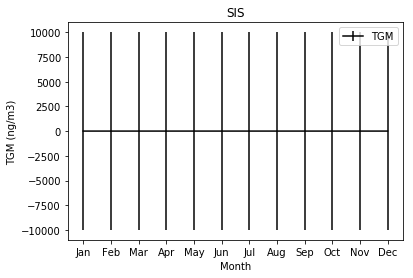

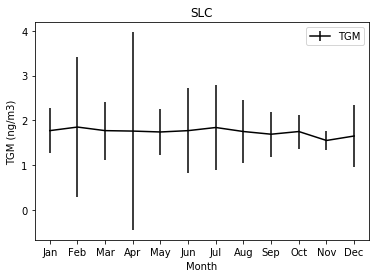

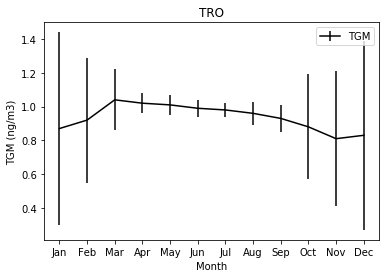

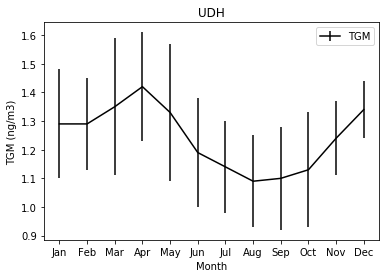

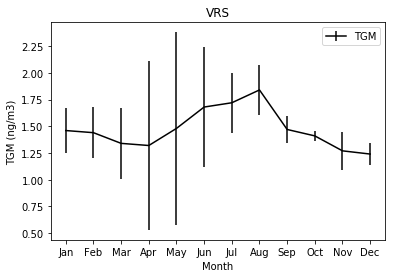

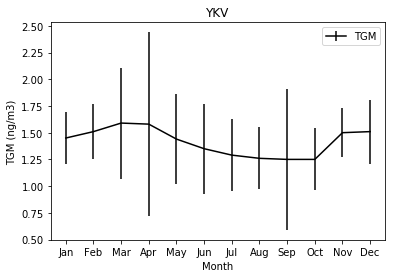

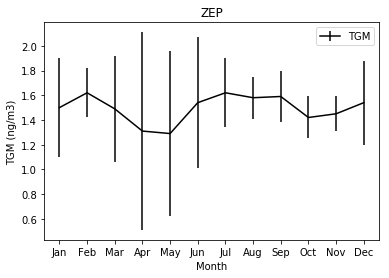

In [38]:
import argparse
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib.backends.backend_pdf import PdfPages

#Read in the data file- Just one site to start-Observed 
 

Hgobs = pd.read_csv('Documents/HG/HgBenchmark/data/TGMSiteMonthly1.csv')





for SiteID in Hgobs['SiteID'].unique():
  
    Dataset = Hgobs[Hgobs.SiteID == SiteID]
    
    

    Dataset.index=pd.to_datetime(Dataset.Month, format='%m')

    ax=Dataset.plot(x='Month', y='Concentration',yerr='Standard deviation',color= "k", title=(SiteID))
    plt.xlabel('Month')
    plt.ylabel('TGM (ng/m3)')
    plt.legend(['TGM'])
    
    ax.set_xticks(Dataset.Month)
    ax.set_xticklabels(Dataset.index.strftime('%b'))
    plt.show()
#where does Jenny want lon and lat



/home/brittany/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


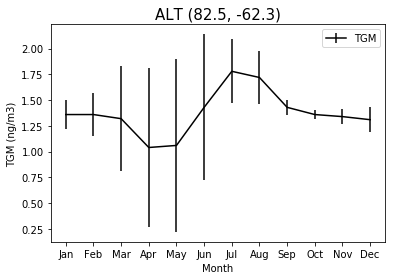

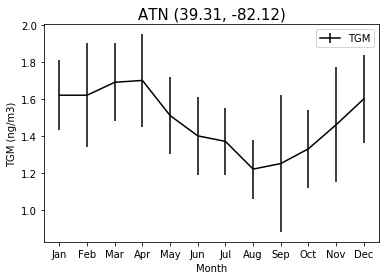

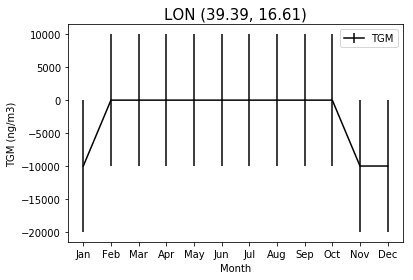

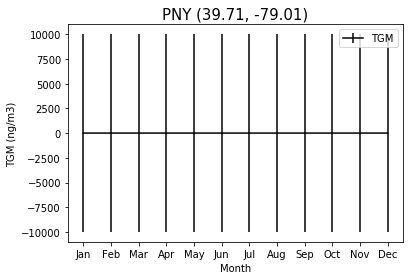

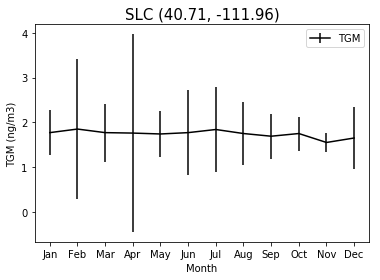

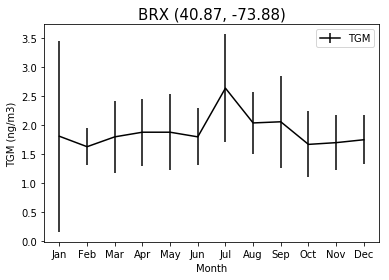

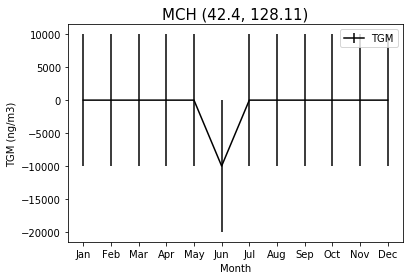

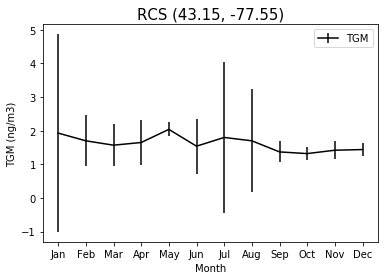

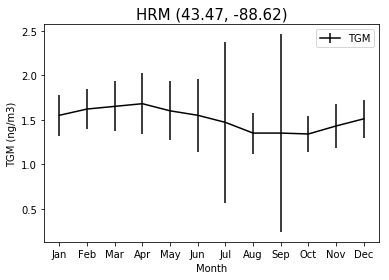

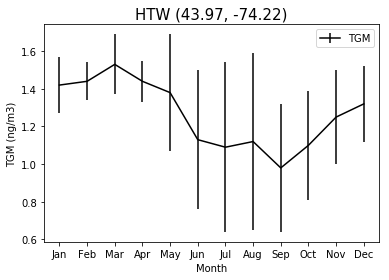

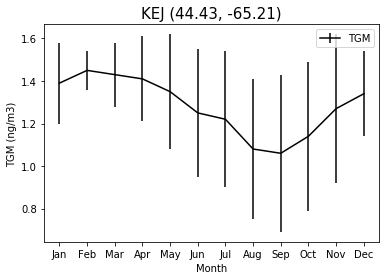

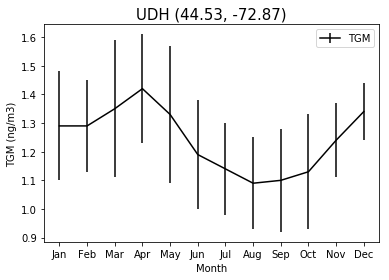

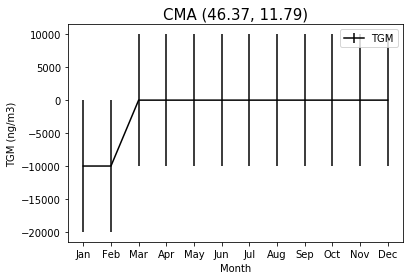

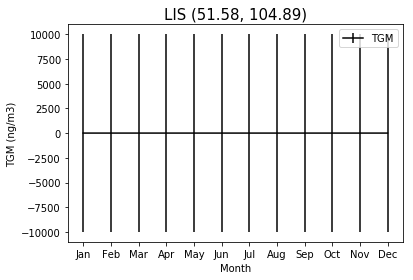

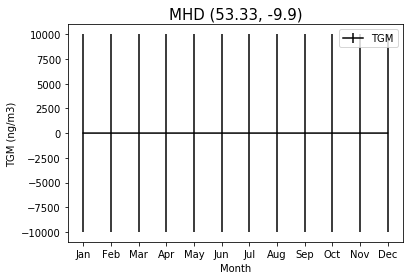

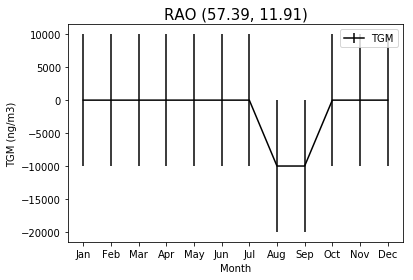

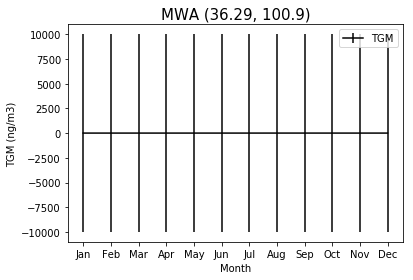

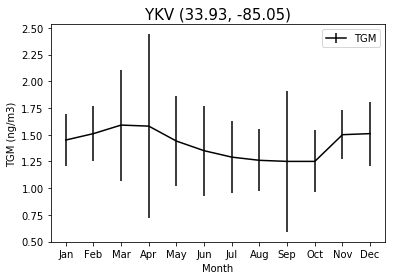

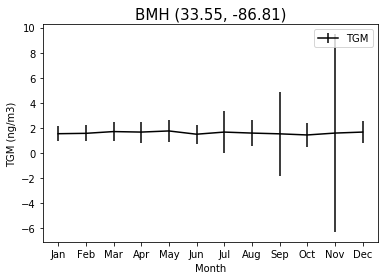

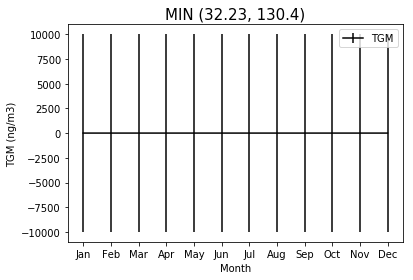

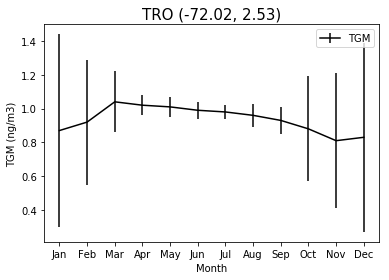

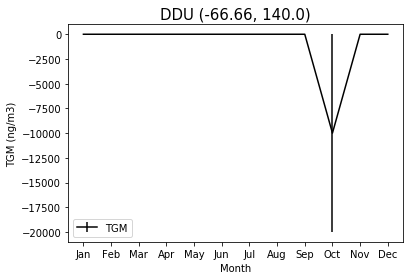

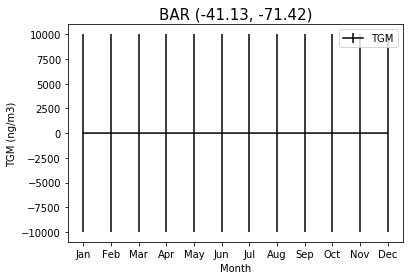

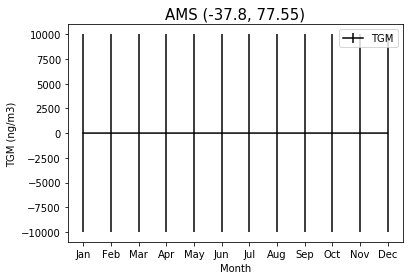

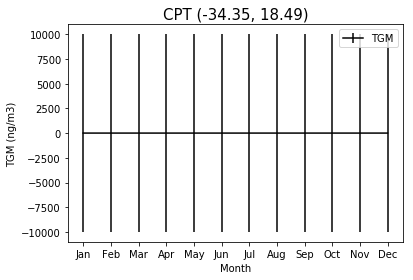

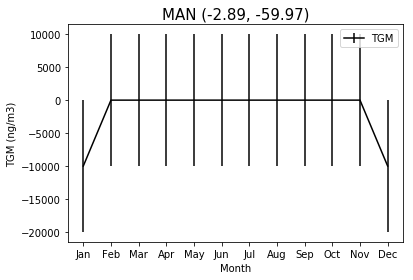

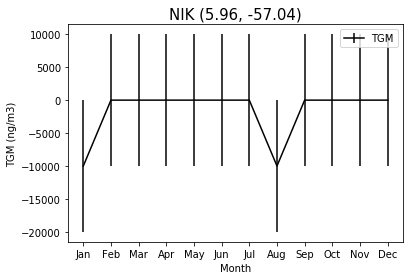

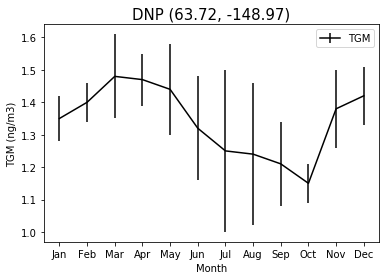

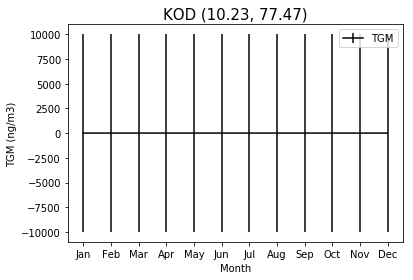

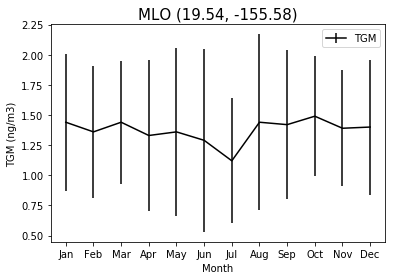

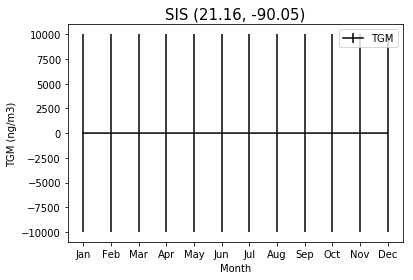

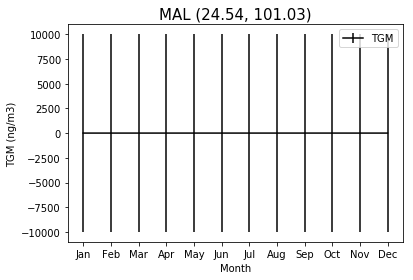

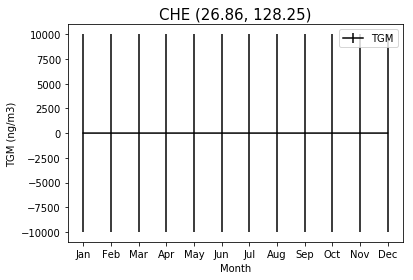

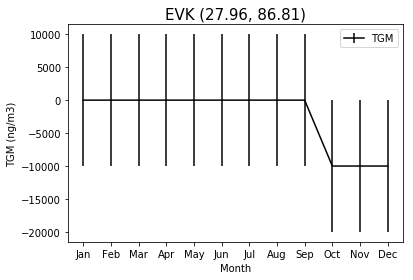

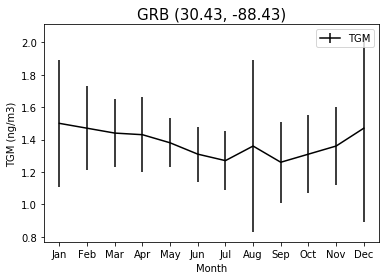

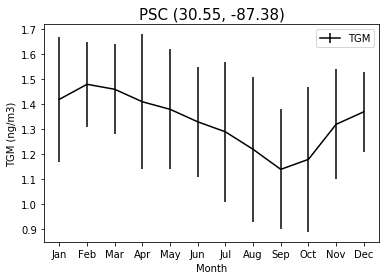

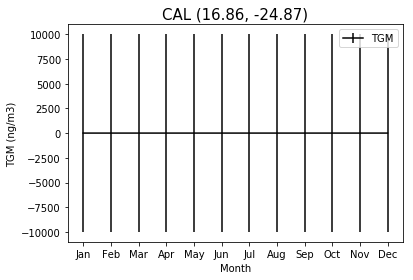

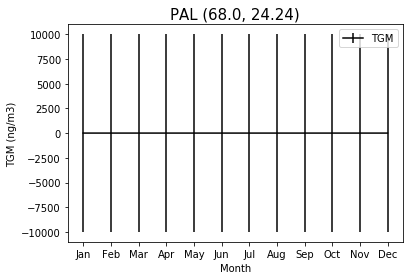

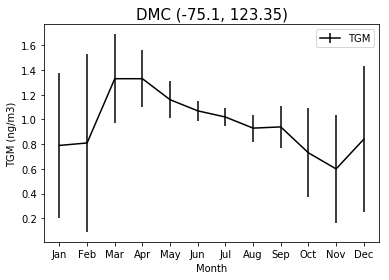

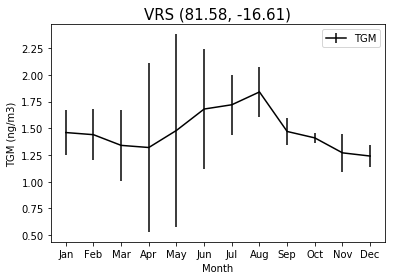

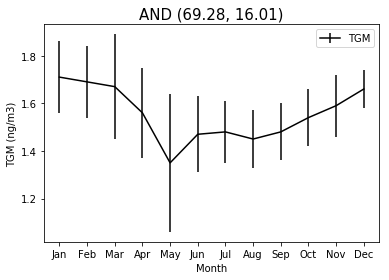

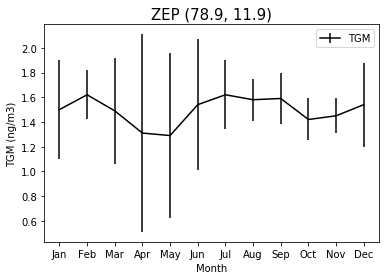

In [78]:
import argparse
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib.backends.backend_pdf import PdfPages


#Read in the data file- Just one site to start-Observed 
 
Hgobs = pd.read_csv('Documents/HG/HgBenchmark/data/TGMSiteMonthly1.csv')
Hgobsorder=Hgobs.sort_values(by=['Lat'], ascending=0)
HgobsOrder=Hgobsorder.sort_values(by=['Month'])



for SiteID in HgobsOrder['SiteID'].unique():
  
    Dataset = HgobsOrder[HgobsOrder.SiteID == SiteID]

    for Lat in Dataset['Lat'].unique():
        Dataset.Lat= Lat
    for Lon in Dataset['Lon'].unique():
        Dataset.Lon= Lon

    Dataset.index=pd.to_datetime(Dataset.Month, format='%m')

    ax=Dataset.plot(x='Month', y='Concentration',yerr='Standard deviation' ,color= "k")
    plt.xlabel('Month')
    plt.ylabel('TGM (ng/m3)')
    plt.legend(['TGM'])
    plt.title('{0} ({1}, {2})'.format(SiteID, Lat, Lon), fontsize=15)
    ax.set_xticks(Dataset.Month)
    ax.set_xticklabels(Dataset.index.strftime('%b'))
    plt.show()
#where does Jenny want lon and lat

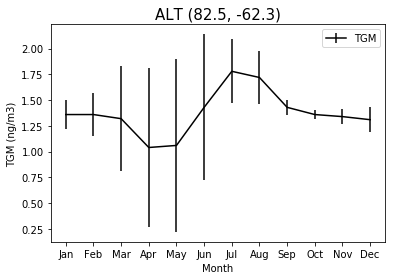

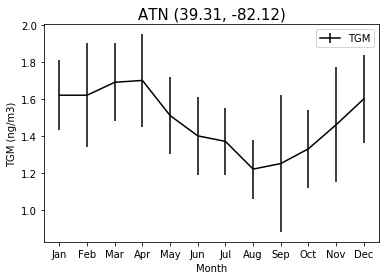

/home/brittany/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


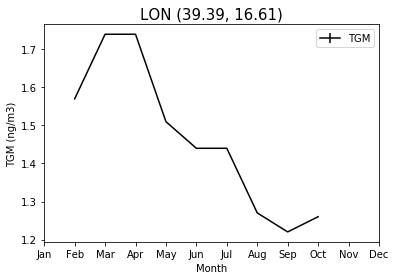

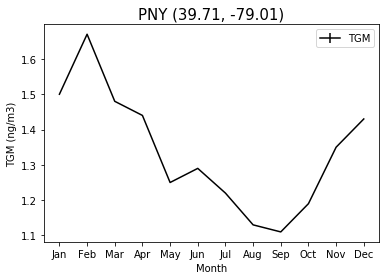

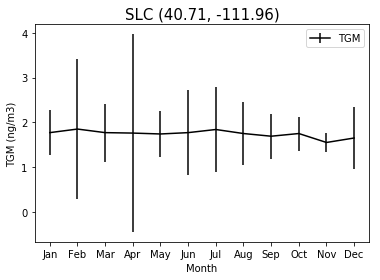

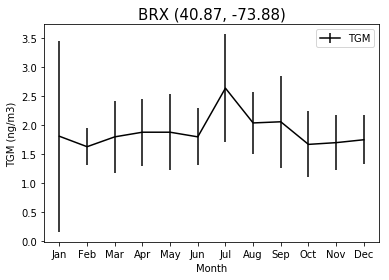

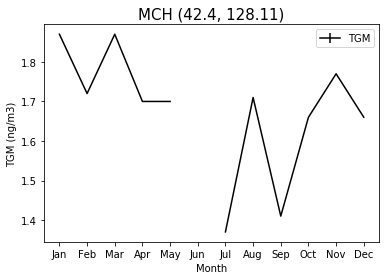

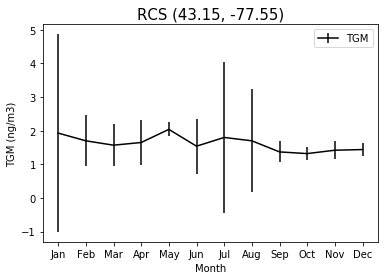

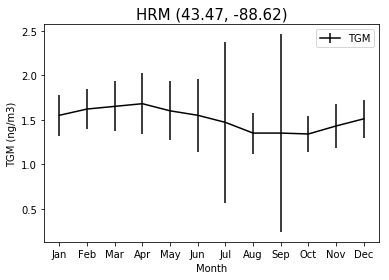

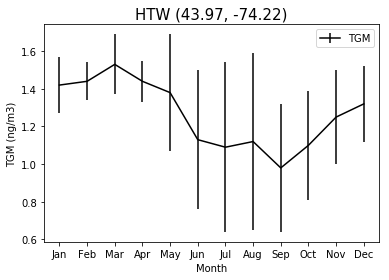

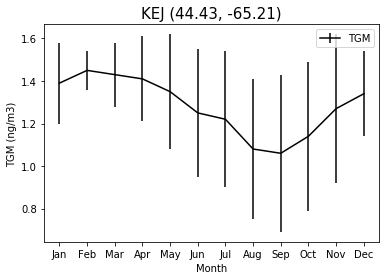

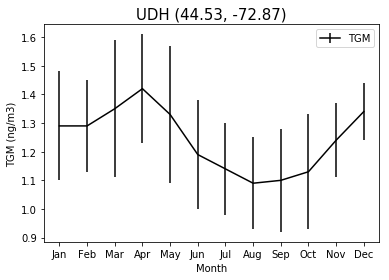

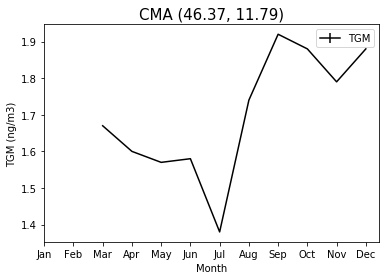

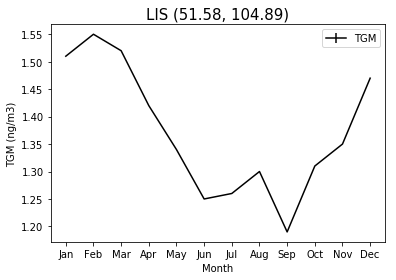

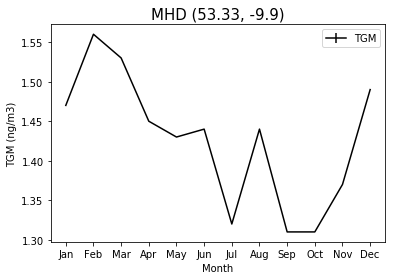

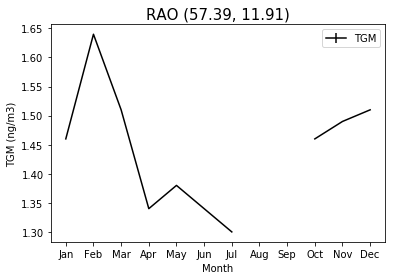

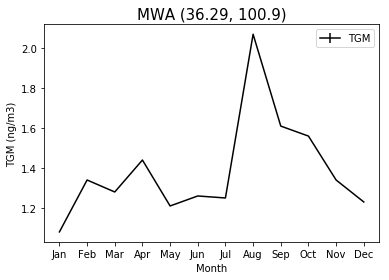

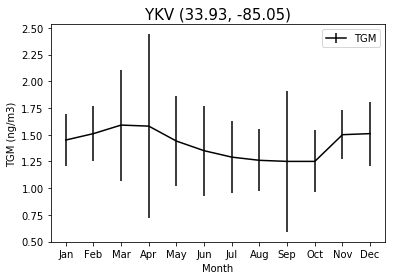

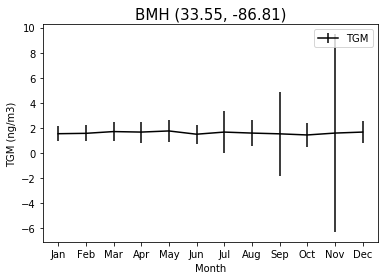

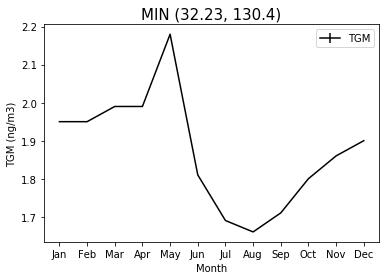

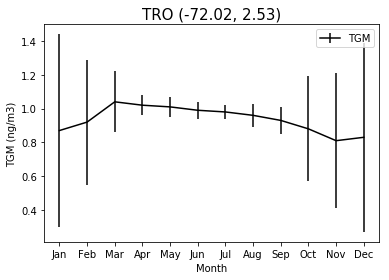

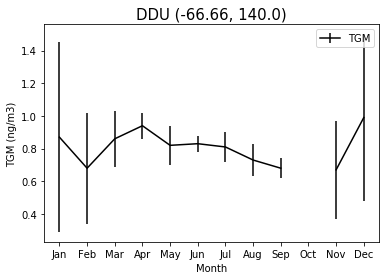

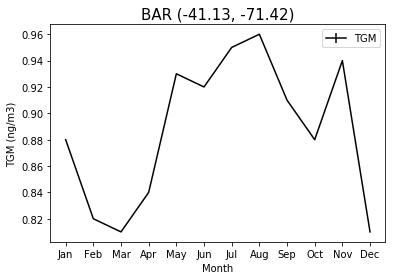

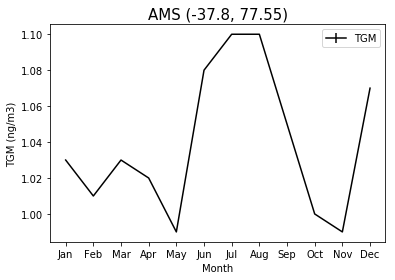

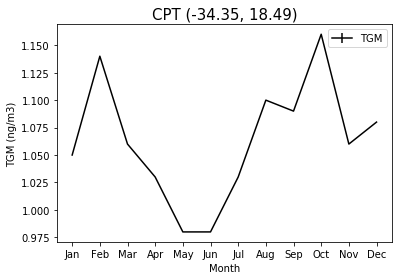

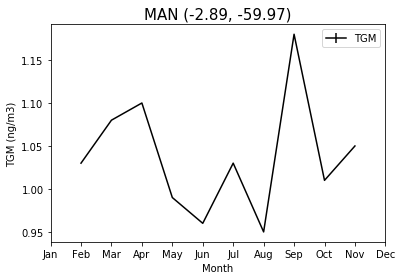

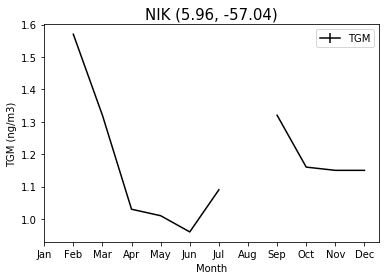

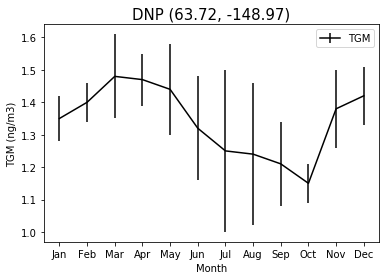

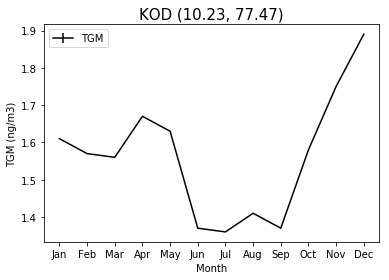

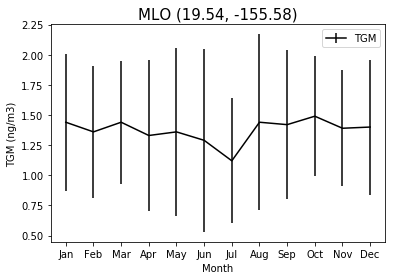

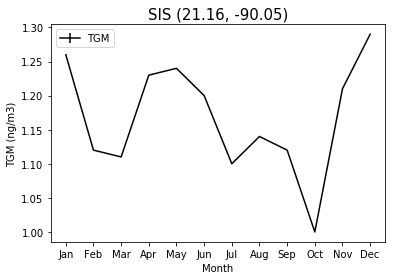

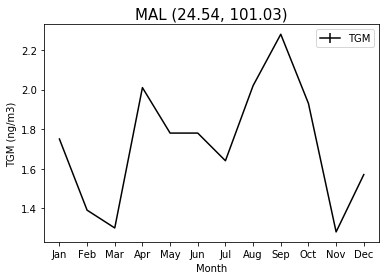

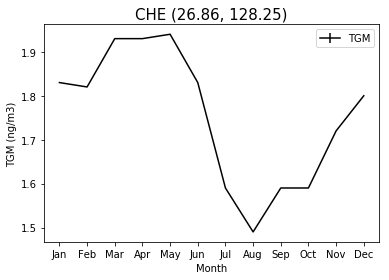

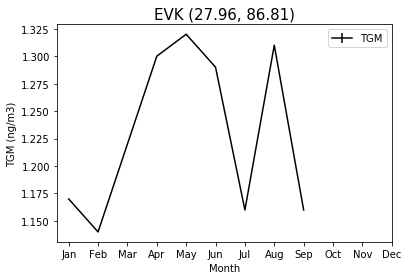

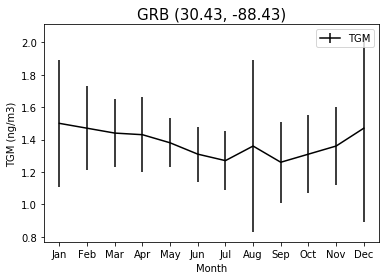

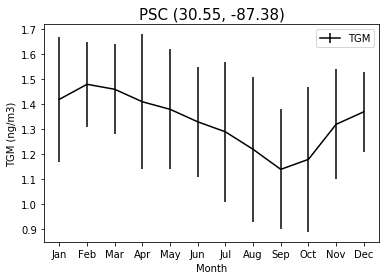

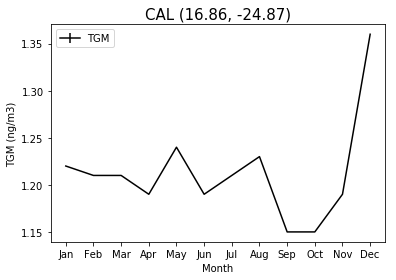

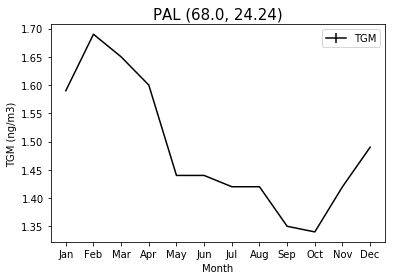

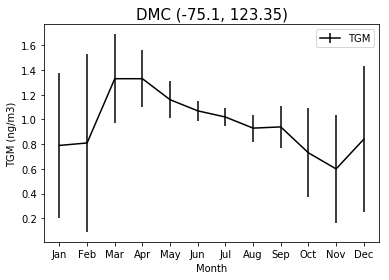

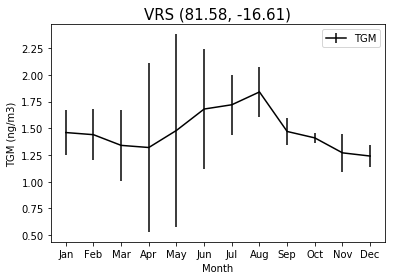

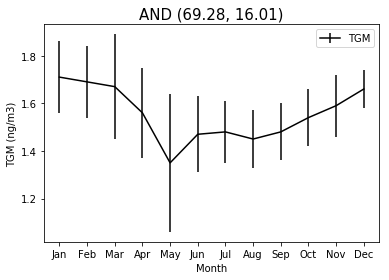

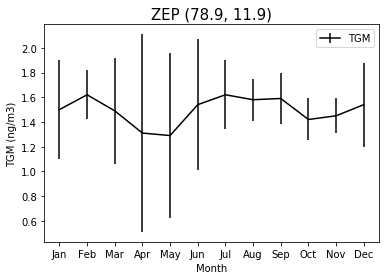

In [79]:
import argparse
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib.backends.backend_pdf import PdfPages

Hgobs = pd.read_csv('Documents/HG/HgBenchmark/data/TGMSiteMonthly1.csv', na_values=(-9999))
Hgobsorder=Hgobs.sort_values(by=['Lat'], ascending=0)
HgobsOrder=Hgobsorder.sort_values(by=['Month'])

#Read in the data file- Just one site to start-Observed 



for SiteID in HgobsOrder['SiteID'].unique():
  
    
    Dataset = HgobsOrder[HgobsOrder.SiteID == SiteID].reset_index()
    

    
    Lat=Dataset.Lat[0]
    Lon=Dataset.Lon[0]
    
    Dataset.index=pd.to_datetime(Dataset.Month, format='%m')
    
    ax=Dataset.plot(x='Month', y='Concentration',yerr='Standard deviation' ,color= "k")
    
    plt.xlabel('Month')
    plt.ylabel('TGM (ng/m3)')
    plt.legend(['TGM'])
    plt.title('{0} ({1}, {2})'.format(SiteID, Lat, Lon), fontsize=15)
    
    ax.set_xticks(Dataset.Month)
    
    ax.set_xticklabels(Dataset.index.strftime('%b'))

    plt.show()